<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Создание-собственных-функций" data-toc-modified-id="Создание-собственных-функций-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Создание собственных функций</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#geo_data_0" data-toc-modified-id="geo_data_0-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span><code>geo_data_0</code></a></span></li><li><span><a href="#geo_data_1" data-toc-modified-id="geo_data_1-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span><code>geo_data_1</code></a></span></li><li><span><a href="#geo_data_2" data-toc-modified-id="geo_data_2-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span><code>geo_data_2</code></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Посчитаем-риски-и-прибыль-для-каждого-региона" data-toc-modified-id="Посчитаем-риски-и-прибыль-для-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Посчитаем риски и прибыль для каждого региона</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Выбор локации для скважины

Исследование для добывающей компании «ГлавРосГосНефть». Задача — решить, где бурить новую скважину.

Для исследования предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

**Описание данных**
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей), целевой признак.

Данные геологоразведки трёх регионов находятся в файлах: 
- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv`


## Загрузка и подготовка данных

**Перед началом работы установим версию `scikit` 1.5.0, чтобы избежать ошибок, которые могут возникнуть из-за различий в названиях команд в разных версиях библиотеки**

In [195]:
pip install scikit-learn==1.5.0 --user

Note: you may need to restart the kernel to use updated packages.


In [196]:
import sklearn
sklearn.__version__ # проверяем результат

'1.5.0'

**Импортируем необходимые для работы библиотеки:**

In [219]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import RandomState
from scipy import stats as st
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    Ridge,
    Lasso,
    LinearRegression
)
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error
)

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import phik

**Объявляем константы:**

In [198]:
RANDOM_STATE = 42

### Создание собственных функций

**Создадим несколько собственных функций, чтобы автоматизировать аналогичные действия.**

Функция для вывода основной информации о датафрейме:

In [199]:
def information_data(data):
    print('Первые десять строк датафрейма:')
    print(data.head(10))
    print()
    print('Общая информация о датафрейме:')
    print(data.info())
    print()
    print('Описание данных:')
    print(data.describe())
    print()
    print('Количество пропусков:')
    print(data.isna().sum())
    print()
    print('Количество дубликатов:')
    print(data.duplicated().sum())

Функция для построения гистограммы:

In [200]:
def plot_histogram(data, column, plot_name, bins_1=10, vline=None):
    data[column].hist(bins=bins_1, color='cornflowerblue', edgecolor='black', alpha=0.5, grid=False)
    plt.title(f'Гистограмма {plot_name}')
    plt.xlabel('объём запасов в скважине (тыс. баррелей)')
    plt.ylabel('частота')
    plt.show()

Функция для построения диаграммы рассеяния:

In [201]:
def plot_scatter(data, y, color, alpha_1=1):
    sns.regplot(data=data, x='product', y=y, scatter_kws={'alpha':alpha_1}, color=color) # добавим линию тренда
    plt.title(f'Диаграмма рассеяния Объём запасов в скважине и {y}')
    plt.ylabel(y)
    plt.xlabel('объём запасов в скважине (тыс. баррелей)')
    plt.show();

### Загрузка данных

In [202]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('C:\\python\\datasets\\geo_data_0.csv')
    geo_data_1 = pd.read_csv('C:\\python\\datasets\\geo_data_1.csv')
    geo_data_2 = pd.read_csv('C:\\python\\datasets\\geo_data_2.csv')

**Ознакомимся с данными:**

#### `geo_data_0`

In [203]:
information_data(geo_data_0)

Первые десять строк датафрейма:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
5  wX4Hy  0.969570  0.489775 -0.735383   64.741541
6  tL6pL  0.645075  0.530656  1.780266   49.055285
7  BYPU6 -0.400648  0.808337 -5.624670   72.943292
8  j9Oui  0.643105 -0.551583  2.372141  113.356160
9  OLuZU  2.173381  0.563698  9.441852  127.910945

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  f

#### `geo_data_1`

In [204]:
information_data(geo_data_1)

Первые десять строк датафрейма:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
5  HHckp  -3.327590  -2.205276  3.003647   84.038886
6  h5Ujo -11.142655 -10.133399  4.002382  110.992147
7  muH9x   4.234715  -0.001354  2.004588   53.906522
8  YiRkx  13.355129  -0.332068  4.998647  134.766305
9  jG6Gi   1.069227 -11.025667  4.997844  137.945408

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   produ

#### `geo_data_2`

In [205]:
information_data(geo_data_2)

Первые десять строк датафрейма:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
5  LzZXx -0.758092  0.710691  2.585887   90.222465
6  WBHRv -0.574891  0.317727  1.773745   45.641478
7  XO8fn -1.906649 -2.458350 -0.177097   72.480640
8  ybmQ5  1.776292 -0.279356  3.004156  106.616832
9  OilcN -1.214452 -0.439314  5.922514   52.954532

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  f

Во всех трех наборах данных отсутствуют пропуски и дубликаты. Типы данных соответствуют содержимому. Можно приступать к исследовательскому анализу данных. Выполним следующие шаги:

- **построим гистограммы**, чтобы посмотреть форму распределения целевого признака для трех датафреймов;
- **построим диаграмму рассеяния**, чтобы определить, какие признаки имеют линейную зависимость, а следовательно, будут использоваться для обучения линейной модели;
- **построим матрицу корреляции**, чтобы понять, какие признаки сильно связаны с целевой переменной (количество нефти в месторождении), а также выявить возможную мультиколлинеарность.

### Исследовательский анализ данных

**Построим гистограммы**

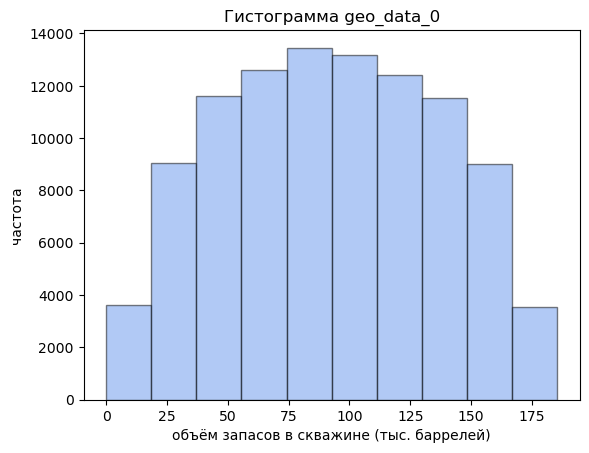

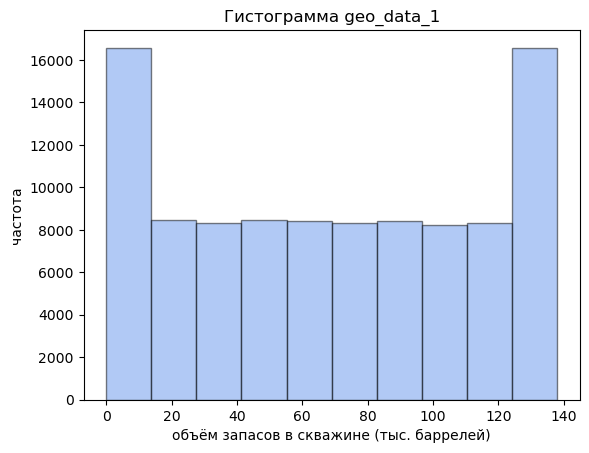

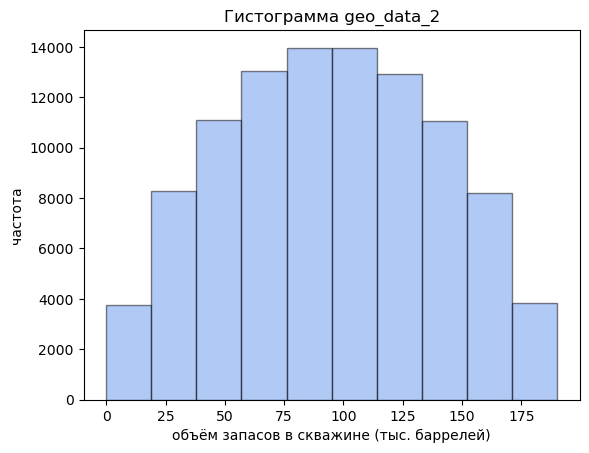

In [206]:
data_list = [geo_data_0, geo_data_1, geo_data_2]
data_names = ['geo_data_0', 'geo_data_1', 'geo_data_2']
    
for i, data in enumerate(data_list):
    plot_histogram(data, 'product', data_names[i])

Распределение целевого признака в наборах данных `0` и `2` выглядит номально. В `geo_data_0` целевой признак `product` распределяется от 0 до 185 тыс. баррелей, пик гистограммы приходится на отметку 90 тыс. баррелей с частотой, близкой к 14000 наблюдений. В `geo_data_2` целевой признак распределяется от 0 до 190 тыс. баррелей, пик гистограммы приходится на 80-100 тыс. баррелей с частотой, близкой к 14000 наблюдений.

Иная картина наблюдается в датасете `geo_data_1`: распределение бимодальное (распределение вероятностей с двумя различными модами).
Бимодальное распределение может указывать на наличие двух разных типов месторождений нефти. Например, одна группа может представлять месторождения с небольшим объемом запасов, а другая группа — месторождения с большим объемом запасов. Это может быть связано с различиями в геологических условиях, таких как тип породы или глубина залегания.

Построим диаграмму рассеяния для каждого набора данных, добавив линию тренда. Чтобы не перегружать график, используем для построения случайные 1000 наблюдений с помощью метода `sample`: 

Построим диаграмму рассеяния для `geo_data_0`:

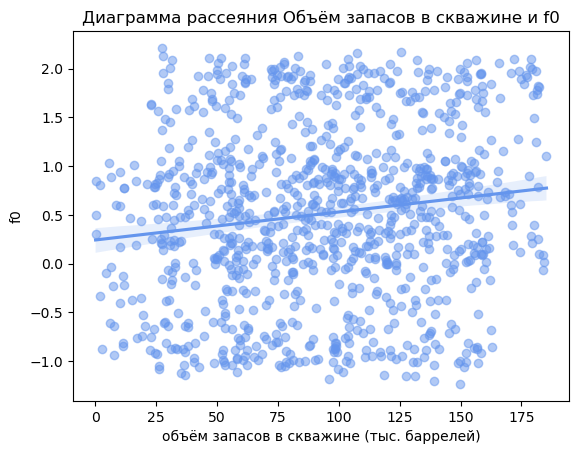

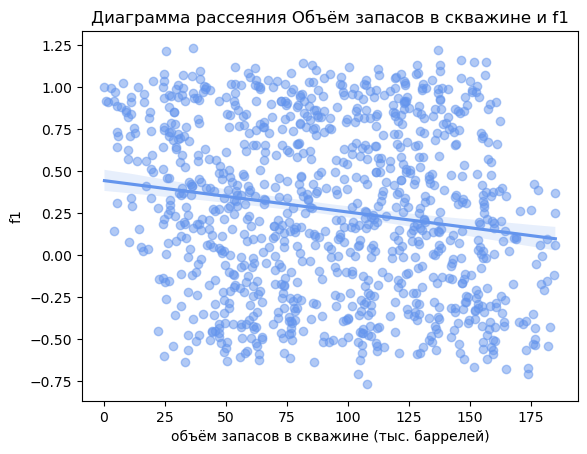

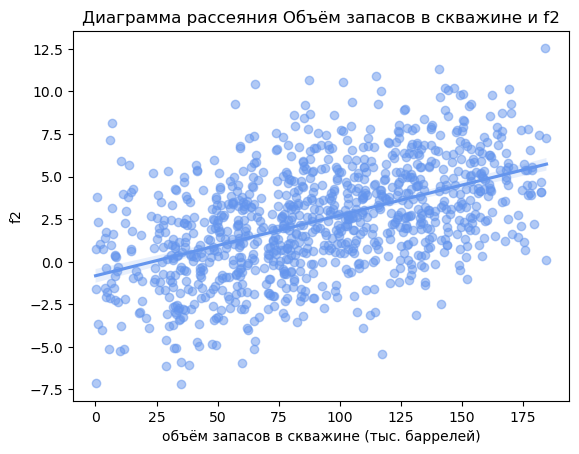

In [207]:
numeric_features = ['f0', 'f1', 'f2']

for feature in numeric_features:
    plot_scatter(geo_data_0.sample(1000), feature, 'cornflowerblue', 0.5)

Взаимосвязь целевого признака `product` и `f0` `f1` `f2`:
- `f0` существует некоторая степень линейной взаимосвязи, поскольку точки данных в общем следуют восходящему тренду от левого нижнего угла к правому верхнему. Это подтверждается линией тренда на графике. Однако стоит отметить, что данные демонстрируют значительный разброс вокруг линии тренда, что указывает на то, что взаимосвязь между этими двумя переменными, хоть и имеет линейную составляющую, может быть сложной и содержать нелинейные элементы или шум.
- `f1` данные показывают слабую положительную корреляцию, что означает, что при увеличении объема запасов в скважине, значение `f1` также, в среднем, увеличивается. Разброс точек вокруг линии тренда довольно большой, что указывает на то, что взаимосвязь между этими двумя переменными, хоть и имеет линейную составляющую, может быть сложной и содержать нелинейные элементы или шум.
- `f2` данные показывают положительную корреляцию, что означает, что при увеличении объема запасов в скважине, значение `f2` также, в среднем, увеличивается. Это видно по общему восходящему тренду точек от левого нижнего угла к правому верхнему. В контексте подготовки данных для обучения линейной модели, это означает, что линейная модель может быть способна выявить общий тренд в данных. Однако, стоит учесть, что взаимосвязь между этими двумя переменными, хоть и имеет линейную составляющую, может быть сложной и содержать нелинейные элементы или шум.

Построим диаграмму рассеяния для `geo_data_1`:

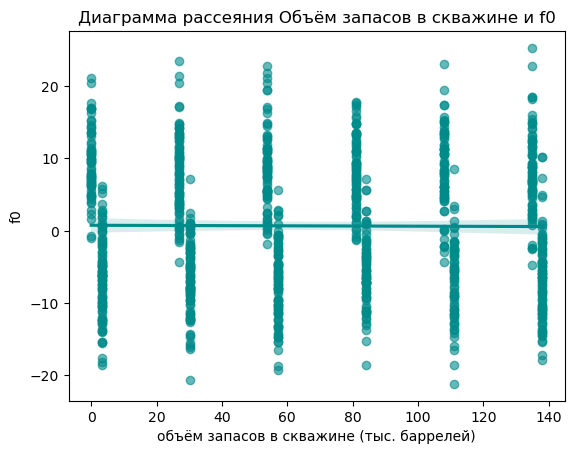

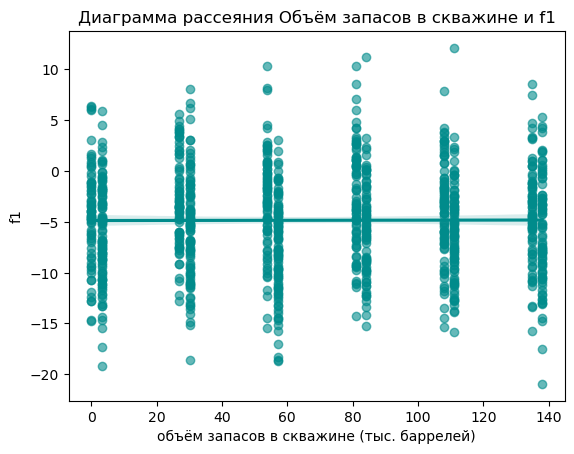

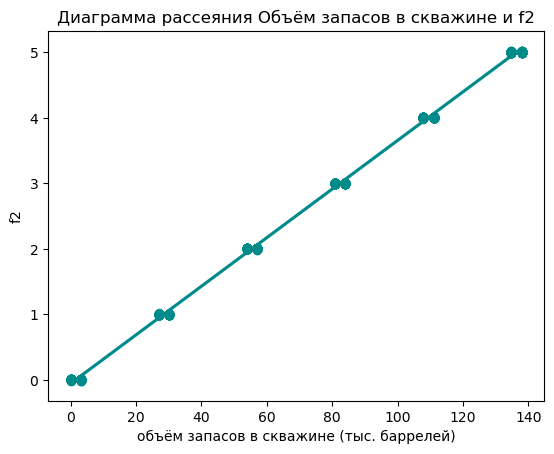

In [208]:
for feature in numeric_features:
    plot_scatter(geo_data_1.sample(1000), feature, 'darkcyan', 0.6)

- `f0` линия тренда имеет легкий наклон вниз, что указывает на слабую отрицательную корреляцию между объёмом запасов и параметром `f0`. Это означает, что при увеличении объёма запасов в скважине значение `f0` имеет тенденцию к снижению, хотя эта зависимость весьма слаба. Точки на графике образуют вертикальные столбцы, что говорит о том, что данные объёма запасов группируются вокруг определённых значений. Это может указывать на дискретность данных или наличие специфических категорий запасов. На графике можно наблюдать некоторые точки, которые заметно отклоняются от основной массы данных. Это могут быть выбросы или шумы, которые могут повлиять на модель при её обучении.
- `f1` взаимосвязан с целевым признаком примерно тем же образом, что и `f0`, за исключением небольшого уклона линии тренда вверх.
- `f2` демонстрирует идеальную линейную зависимость между объёмом запасов и параметром `f2`. Все точки лежат на прямой линии, что указывает на сильную положительную корреляцию между этими двумя переменными. На графике отсутствуют разбросы и выбросы, все точки чётко следуют линии тренда. Такая чёткая линейная зависимость означает, что можно предсказать значение `f2` с высокой точностью, зная объём запасов в скважине. 

Построим диаграмму рассеяния для `geo_data_2`:

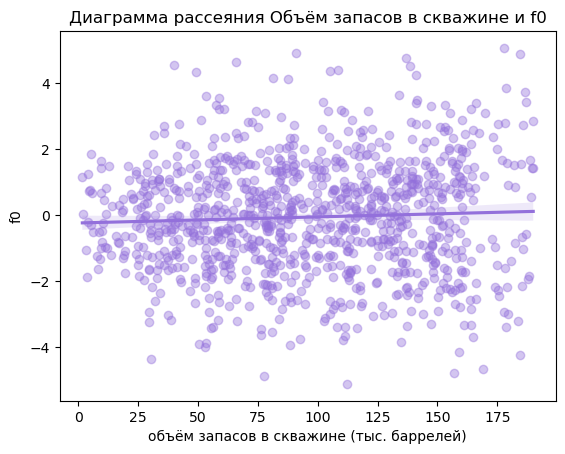

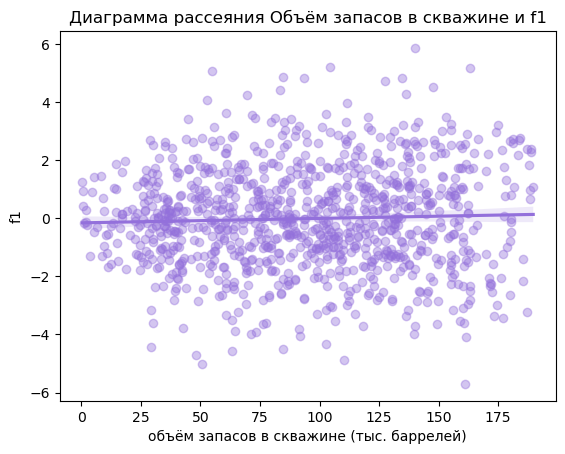

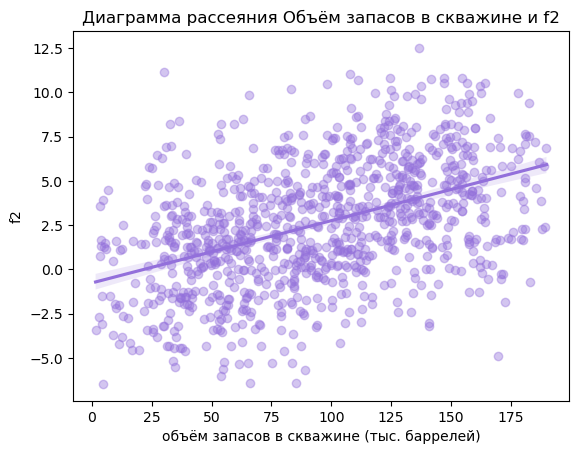

In [209]:
for feature in numeric_features:
    plot_scatter(geo_data_2.sample(1000), feature, 'mediumpurple',  0.4)

- `f0` существует некоторая степень линейной взаимосвязи, однако стоит отметить, что данные демонстрируют значительный разброс вокруг линии тренда, что указывает на то, что взаимосвязь между этими двумя переменными, хоть и имеет линейную составляющую, может быть сложной и содержать нелинейные элементы или шум.
- `f1` данные показывают слабую отрицательную корреляцию, что означает, что при увеличении объема запасов в скважине, значение `f1`, в среднем, незначительно уменьшается. Разброс точек вокруг линии тренда довольно большой, что указывает на то, что взаимосвязь между этими двумя переменными, хоть и имеет линейную составляющую, может быть сложной и содержать нелинейные элементы или шум.
- `f2` данные показывают положительную корреляцию, что означает, что при увеличении объема запасов в скважине, значение `f2` также, в среднем, увеличивается. Это видно по общему восходящему тренду точек от левого нижнего угла к правому верхнему. В контексте подготовки данных для обучения линейной модели, это означает, что линейная модель может быть способна выявить общий тренд в данных. Однако, стоит учесть, что взаимосвязь между этими двумя переменными, хоть и имеет линейную составляющую, может быть сложной и содержать нелинейные элементы или шум.

**Построим матрицу корреляции `phik` для каждого набора данных**

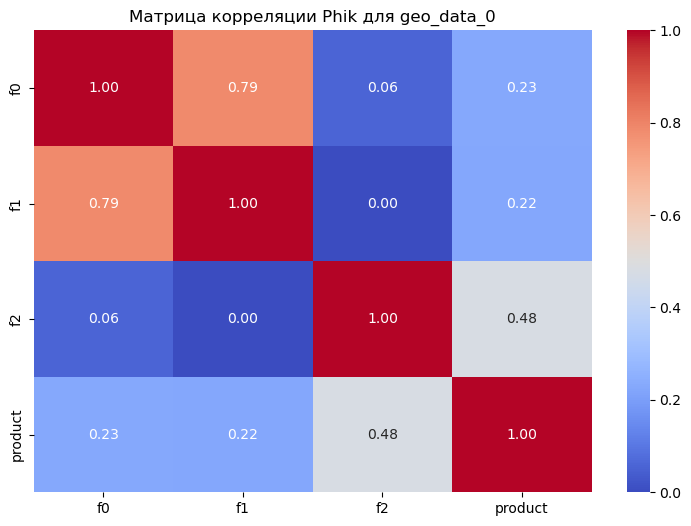

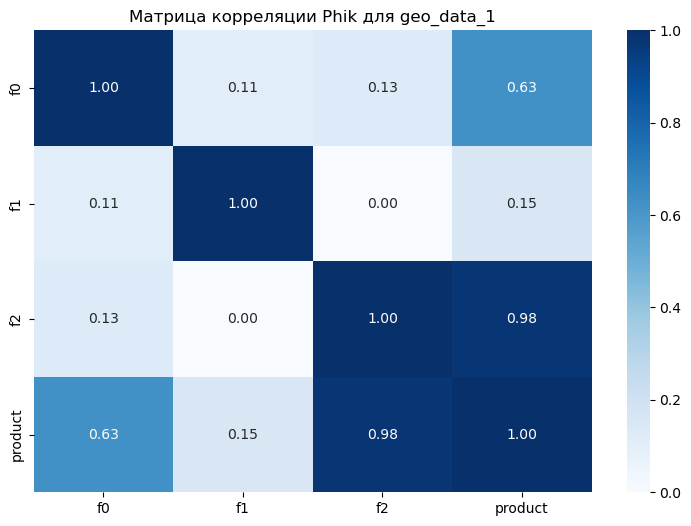

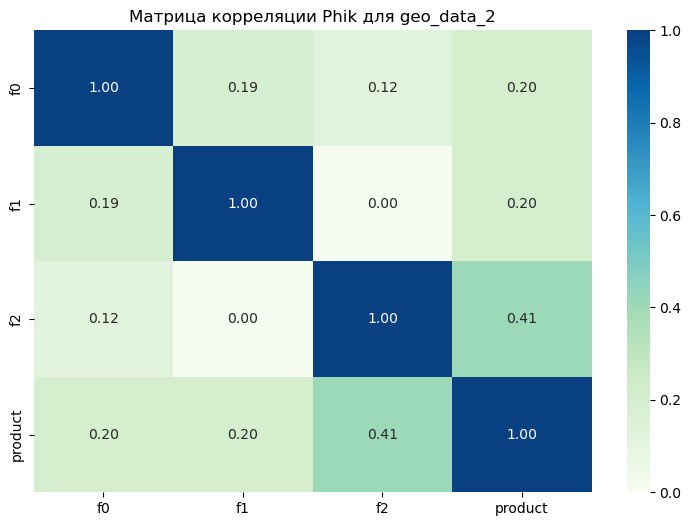

In [210]:
color_maps = itertools.cycle(['coolwarm', 'Blues', 'GnBu', 'inferno', 'magma'])

for i, data in enumerate(data_list):
    phikmatrix = data[['f0', 'f1', 'f2', 'product']].sample(1000, random_state=RANDOM_STATE).phik_matrix(interval_cols=['f0', 'f1','f2','product']) 
    # визуализация матрицы корреляции с помощью тепловой карты
    plt.figure(figsize=(9, 6))
    cmap = next(color_maps)
    sns.heatmap(phikmatrix, annot=True, fmt=".2f", cmap=cmap, cbar=True)
    plt.title(f'Матрица корреляции Phik для {data_names[i]}')
    plt.show()

`geo_data_0` 

- корреляция между `f0` и объёмом запасов в скважине составляет 0.22. Это слабая положительная корреляция, что указывает на то, что с увеличением значения `f0` объём запасов в скважине имеет тенденцию к увеличению, но эта зависимость незначительна.
- `f1` и `product` (0.22): также слабая положительная корреляция, что означает, что с увеличением значения `f1` объём запасов в скважине немного увеличивается, но влияние этого признака на целевой показатель незначительное.
- `f2` и `product` (0.48): умеренная положительная корреляция, что указывает на более значительное влияние `f2` на объём запасов в скважине. 

Взаимосвязи между признаками
- `f0` и `f1` (0.79): высокая положительная корреляция, что указывает на сильную взаимосвязь между этими двумя признаками. Они увеличиваются вместе, что может указывать на потенциальную коллинеарность.
- `f0` и `f2` (0.06), `f1` и `f2` (0.00): отсутствие корреляции.


`geo_data_1` 

- `f0` и `product` (0.63): умеренная положительная корреляция, что указывает на значительное влияние `f0` на объём запасов в скважине. 
- `f1` и `product` (0.15): слабая положительная корреляция, что означает, что с увеличением значения f1 объём запасов в скважине немного увеличивается, но влияние этого признака на целевой показатель незначительное.
- `f2` и `product` (0.98): очень высокая положительная корреляция, что указывает на значительное влияние `f2` на объём запасов в скважине. С увеличением значения `f2` объём запасов в скважине имеет тенденцию к значительному увеличению.

Взаимосвязи между признаками
- `f0` и `f1` (0.11) и `f0`и `f2` (0.13): очень слабая положительная корреляция, что указывает на практически независимую взаимосвязь между этими двумя признаками.
- `f1` и `f2` (0.00): отсутствие корреляции.

`geo_data_2` 

- `f0` и `product` (0.2) и `f1` и `product` (0.2): слабая положительная корреляция, что указывает на незначительное влияние `f0` на объём запасов в скважине. 
- `f2` и `product` (0.41): умеренная положительная корреляция, что указывает на более значительное влияние `f2` на объём запасов в скважине. С увеличением значения `f2` объём запасов в скважине имеет тенденцию к увеличению в большей степени по сравнению с `f0` и `f1`.

Взаимосвязи между признаками
- `f0` и `f1` (0.2) и `f0` и `f2` (0.12): очень слабая положительная корреляция.
- `f1` и `f2` (0.00): отсутствие корреляции. 

### Вывод 

На данном этапе загрузили данные, провели **предварительный осмотр**: во всех трех наборах данных отсутствуют пропуски и дубликаты, типы данных соответствуют содержимому. 

В ходе **исследовательского анализа** данных построили гистограммы распределения целевого признака `product`, построили диаграммы рассеяния, провели корреляционный анализ. 

## Обучение и проверка модели

Обучение модели и подготовку данных будем проводить в пайплайне. Подберем с помощью поиска по сетке `GridSearchCV` гиперпараметры для моделей `LinearRegression`, `Lasso`, `Ridge`. 

Выведем гиперпараметры лучшей модели для каждого набора данных, предсказанный объем запасов и реальный. Проверять модель будем с помощью метрики `RMSE`

In [211]:
numeric_features = ['f0', 'f1', 'f2']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [212]:
models = [
    {
        'regressor': [LinearRegression()],
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 0.5, 1.0, 2.0],
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 0.5, 1.0, 2.0],
    }
]

# создаем пайплайн
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# используем GridSearchCV для поиска лучшей модели и гиперпараметров
grid_search = GridSearchCV(pipeline, models, cv=5, scoring='neg_mean_squared_error', error_score='raise')

datasets = [geo_data_0, geo_data_1, geo_data_2]

best_models = []
best_params = []
predictions = []

for i, data in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['id', 'product'], axis=1), data['product'], random_state=RANDOM_STATE)
    
    grid_search.fit(X_train, y_train)
    pred = grid_search.predict(X_test)
    predictions.append(pred)
    rmse = np.sqrt(-grid_search.best_score_)
    best_models.append(grid_search.best_estimator_)
    best_params.append(grid_search.best_params_)
    
    print(f"Лучшая модель для региона {i}: ", grid_search.best_estimator_)
    print(f"Лучшие гиперпараметры для региона {i}: ", grid_search.best_params_)
    print(f"Лучшее значение метрики RMSE для региона {i}: ", round(rmse, 2))
    print('Средний предсказанный запас сырья: ', round(pred.mean(), 3), 'тыс.барр.')
    print('Средний реальный запас сырья: ', round(y_test.mean(),3), 'тыс.барр.')
    print('Разница между реальным и предсказанным запасами сырья: ', round(y_test.mean() - pred.mean(), 2), 'тыс.барр.')
    print('----------------------------------------------------------------------')

Лучшая модель для региона 0:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f0', 'f1', 'f2'])])),
                ('regressor', Ridge(alpha=2.0))])
Лучшие гиперпараметры для региона 0:  {'regressor': Ridge(), 'regressor__alpha': 2.0}
Лучшее значение метрики RMSE для региона 0:  37.67
Средний предсказанный запас сырья:  92.399 тыс.барр.
Средний реальный запас сырья:  92.326 тыс.барр.
Разница между реальным и предсказанным запасами сырья:  -0.07 тыс.барр.
----------------------------------------------------------------------
Лучшая модель для региона 1:  Pipeline(steps=[(

Проверим адекватность моделей с помощью константной модели:

In [213]:
for i, data in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['id', 'product'], axis=1), data['product'], random_state=RANDOM_STATE)
    
    dummy = DummyRegressor(strategy='mean')
    dummy.fit(X_train, y_train)
    dummy_pred = dummy.predict(X_test)
    dummy_rmse = np.sqrt(np.mean((y_test - dummy_pred) ** 2))
    
    print(f"Константная модель для региона {i}: RMSE = {round(dummy_rmse, 2)}")

Константная модель для региона 0: RMSE = 44.28
Константная модель для региона 1: RMSE = 45.94
Константная модель для региона 2: RMSE = 44.78


### Вывод

В пайплайне провели обучение модели и подготовку данных. Подобрали с помощью поиска по сетке `GridSearchCV` гиперпараметры для моделей `LinearRegression`, `Lasso`, `Ridge`. 

- Лучшее значение метрики RMSE для региона 0:  37.67

- Лучшее значение метрики RMSE для региона 1:  0.89. Такая низкая метрика `RMSE` связана с очень сильной корреляцией целевого признака в наборе данных и признака `f2`

- Лучшее значение метрики RMSE для региона 2:  40.03

Проверка адекватности модели с помощью константной модели показала такие значения метрики `RMSE`:
- Константная модель для региона 0: RMSE = 44.28

- Константная модель для региона 1: RMSE = 45.94

- Константная модель для региона 2: RMSE = 44.78

**Для регионов 0 и 2**

Поскольку значения `RMSE` моделей значительно ниже, чем у константной модели, это показывает, что модели лучше справляются с задачей предсказания. Значения `RMSE` находятся в разумных пределах, что указывает на адекватность моделей.

**Для региона 1**

Один из входных признаков имеет очень высокую корреляцию (0.98) с целевым признаком, модель может очень точно предсказывать целевое значение на основе этого признака.

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Ключевые значения для расчётов сохраним в отдельных переменных, рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 

Напишем выводы по этапу подготовки расчёта прибыли.


In [214]:
budget = 10_000_000_000 # бюджет на разработку скважин в регионе 
wells = 200 # лучшие точки для разработки
revenue = 450_000 # сумма дохода с тыс. барр.

**Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.**

In [215]:
volume_per_well = budget / wells / revenue
print('Достаточный объём сырья для безубыточной разработки новой скважины: ', round(volume_per_well, 2), 'тыс.барр.')

Достаточный объём сырья для безубыточной разработки новой скважины:  111.11 тыс.барр.


Средний запас сырья в регионе 0:  92.326 тыс.барр.

Средний запас сырья в регионе 1:  68.725 тыс.барр.

Средний запас сырья в регионе 2:  95.151 тыс.барр.

### Вывод

Рассчитан достаточный объём сырья для безубыточной разработки новой скважины, он составляет 111.11 тыс.бар. Во всех трех регионах средний запас сырья не превышает 100 тыс. барр., что меньше необходимого для безубыточной разработки новой скважины.

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [216]:
def calculate_profit(predictions, target):
    # выбираем индексы 200 скважин с наибольшими предсказанными значениями
    top_wells_indx = np.argsort(predictions)[-wells:]    
    # суммируем реальные значения объёма сырья для этих скважин
    selected_target_sum = target[top_wells_indx].sum()
    total_revenue = selected_target_sum * revenue
    profit = total_revenue - budget
    return profit

## Посчитаем риски и прибыль для каждого региона

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [226]:
# Параметры
bootstrap_samples = 1000
confidence_interval = 0.95
loss_threshold = 0
risk_threshold = 0.025  # порог риска убытков
state = RandomState(42)
risks = []
mean_profits = []

# Для каждого региона
for i, data in enumerate(datasets):
    profits = []
    losses = 0

    # Bootstrap
    for _ in range(bootstrap_samples):
        subsample = data.sample(n=500, replace=True, random_state=state)
        best_200 = subsample.nlargest(wells, 'product')
        profit = best_200['product'].sum() * revenue - budget
        profits.append(profit)
    
    profits = np.array(profits)
    mean_profit = profits.mean()
    lower = np.percentile(profits, ((1 - confidence_interval) / 2) * 100)
    upper = np.percentile(profits, (confidence_interval + ((1 - confidence_interval) / 2)) * 100)
    risk_of_loss = (profits < loss_threshold).mean()

    print(f"Регион {i}:")
    print(f"Средняя прибыль: {mean_profit}")
    print(f"{confidence_interval*100}% доверительный интервал: ({lower}, {upper})")
    print(f"Риск убытков: {risk_of_loss * 100:.2f}%")
    print('------------------------------------------------------------')

    risks.append(risk_of_loss)
    mean_profits.append(mean_profit)

best_region = None
max_profit = -np.inf

for i in range(len(datasets)):
    if risks[i] < risk_threshold and mean_profits[i] > max_profit:
        best_region = i
        max_profit = mean_profits[i]

if best_region is not None:
    print(f"Лучший регион для разработки: Регион {best_region}")
else:
    print("Нет региона, удовлетворяющего условиям.")

Регион 0:
Средняя прибыль: 2394986084.5946054
95.0% доверительный интервал: (2015060294.8270385, 2792627557.7064524)
Риск убытков: 0.00%
------------------------------------------------------------
Регион 1:
Средняя прибыль: 453443970.964173
95.0% доверительный интервал: (60236778.53766559, 856623227.2407409)
Риск убытков: 1.30%
------------------------------------------------------------
Регион 2:
Средняя прибыль: 2631075493.625628
95.0% доверительный интервал: (2238611694.3131475, 2992538445.5424757)
Риск убытков: 0.00%
------------------------------------------------------------
Лучший регион для разработки: Регион 2


In [233]:
bootstrap_samples = 1000
confidence_interval = 0.95
loss_threshold = 0
risk_threshold = 0.025  # порог риска убытков
state = RandomState(42)
risks = []
mean_profits = []

# Для каждого региона
for i, data in enumerate(datasets):
    # Используем целевой признак product для получения прибыли
    y = data['product']
    
    profits = []
    
    # Bootstrap
    for _ in range(bootstrap_samples):
        # Получаем случайную выборку из 500 точек
        target_subsample = y.sample(n=500, replace=True, random_state=state)
        # Для вычисления прибыли используем значения этой выборки
        profit = calculate_profit(target_subsample, target_subsample)
        profits.append(profit)
    
    profits = np.array(profits)
    mean_profit = profits.mean()
    lower = round(np.percentile(profits, ((1 - confidence_interval) / 2) * 100), 2)
    upper = round(np.percentile(profits, (confidence_interval + ((1 - confidence_interval) / 2)) * 100), 2)
    risk_of_loss = (profits < loss_threshold).mean()
    
    print(f'Регион {i}:')
    print('Средняя прибыль:', round(mean_profit / 1_000_000, 2), 'млн. руб.')
    print(f"{confidence_interval * 100}% доверительный интервал: ({lower}, {upper})")
    print(f"Риск убытков: {risk_of_loss * 100:.2f}%")
    print('------------------------------------------------------------')
    
    risks.append(risk_of_loss)
    mean_profits.append(mean_profit)

# Выбор региона с наименьшим риском убытков и наибольшей средней прибылью
best_region = None
max_profit = -np.inf

for i in range(len(datasets)):
    if risks[i] < risk_threshold and mean_profits[i] > max_profit:
        best_region = i
        max_profit = mean_profits[i]

if best_region is not None:
    print(f"Лучший регион для разработки: Регион {best_region}")
else:
    print("Нет региона, удовлетворяющего условиям.")

Регион 0:
Средняя прибыль: 2394.99
95.0% доверительный интервал: (2015060294.83, 2792627557.71)
Риск убытков: 0.00%
------------------------------------------------------------
Регион 1:
Средняя прибыль: 453.44
95.0% доверительный интервал: (60236778.54, 856623227.24)
Риск убытков: 1.30%
------------------------------------------------------------
Регион 2:
Средняя прибыль: 2631.08
95.0% доверительный интервал: (2238611694.31, 2992538445.54)
Риск убытков: 0.00%
------------------------------------------------------------
Лучший регион для разработки: Регион 2


## Вывод

Для исследования было представлено три набора данных, содержащих информацию о месторождениях нефти в трех регионах. Проверили на наличие пропусков и дубликатов, провели исследовательский анализ с построением визуализаций, проведен корреляционный анализ.

В ходе исследования была построена модель машинного обучения с целью определить регион, где добыча принесёт наибольшую прибыль. В пайплайне провели обучение модели и подготовку данных. Подобрали с помощью поиска по сетке `GridSearchCV` гиперпараметры для моделей `LinearRegression`, `Lasso`, `Ridge`. Проверка адекватности модели была проведена с помощью константной модели.

Лучшим регионов для разработки оказался регион 2, так как риск убытков составляет 0.00 %, а средняя прибыль в регионе самая высокая.